In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('../datasets/SA_same_ratio/train_dataset_ratio.csv')
test_data = pd.read_csv('../datasets/SA_same_ratio/test_dataset_ratio.csv')

In [5]:
Labels={
 0: "negative",
 1: "neutral",
 2: "positive",
}

In [7]:
train_data['label']=train_data['three_emo_0n1n2p']
train_data=train_data.replace({"label": Labels})
train_data

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"stories with intrigue, character development ...",303,Narrative,53,2.0,0,2,7,negative
1,I also think it would be better if they devel...,136,Interaction and Socialisation,51,2.0,0,2,27,negative
2,the devs do not seem to have what it takes to...,318,Developer,43,2.0,0,2,17,negative
3,... we are discovering language of aliens but ...,450,Exploration,47,2.0,0,2,24,negative
4,"Being a difficult game it is,",726,Difficulty and Game Balance,44,2.0,0,2,6,negative
...,...,...,...,...,...,...,...,...,...
2172,When a player settles down on a planet and mak...,2930,Ownership,22,4.0,2,0,30,positive
2173,I'm sure it will be better after some time in ...,1548,Development states,37,2.0,0,2,12,negative
2174,"Gunfights are scary, loud, and you feel relie...",127,Survival mechanics,12,5.0,2,0,20,positive
2175,I enjoy going with a full team being commander...,1209,Interaction and Socialisation,51,5.0,2,0,28,positive


In [8]:
test_data['label']=test_data['three_emo_0n1n2p']
test_data=test_data.replace({"label": Labels})
test_data

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"in addition, the developers made the game as a...",1554,Updates,60,3.0,1,1,79,neutral
1,as trolls will gladly make them inaccessible.,681,Interaction and Socialisation,51,1.0,0,2,7,negative
2,"l, kinda pricey too even after discount it jus...",1750,Price-quality ratio,38,2.0,0,2,14,negative
3,"There's still lots for me to discover for now,",2680,Exploration,47,5.0,2,0,9,positive
4,"you ""cannot"" talk about this game and not talk...",3032,Novelty,54,2.0,0,2,61,negative
...,...,...,...,...,...,...,...,...,...
929,still knows it's a GAME and is firmly focused ...,2240,Engaging Gameplay,46,5.0,2,0,19,positive
930,Sometimes the 'profanity' filter disallows som...,2213,Content filter,16,2.0,0,2,50,negative
931,"the sound for this game is really good, guns f...",2568,Audio,39,5.0,2,0,30,positive
932,The hostages are governed by some of the worst...,2461,Interaction and Socialisation,51,1.0,0,2,85,negative


In [9]:
# Feature extraction
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = train_data['label']
y_test = test_data['label']

In [10]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [11]:
# Predict on test data
y_pred = nb_classifier.predict(X_test)


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [13]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6692
Precision: 0.6684
F1 Score: 0.6303


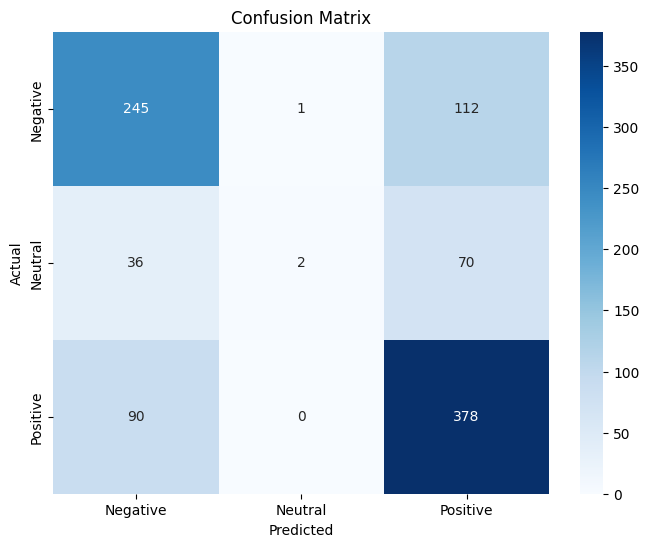

In [14]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ADD CV

Fold Accuracy: 0.6514
Fold Precision: 0.6975
Fold F1 Score: 0.6065
Fold Accuracy: 0.6766
Fold Precision: 0.6398
Fold F1 Score: 0.6406
Fold Accuracy: 0.6483
Fold Precision: 0.5775
Fold F1 Score: 0.6099
Fold Accuracy: 0.6529
Fold Precision: 0.5848
Fold F1 Score: 0.6145
Fold Accuracy: 0.6483
Fold Precision: 0.6880
Fold F1 Score: 0.6100

Cross-Validation Results:
Mean Accuracy: 0.6555
Mean Precision: 0.6375
Mean F1 Score: 0.6163


D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Set Results:
Accuracy: 0.6692
Precision: 0.6684
F1 Score: 0.6303


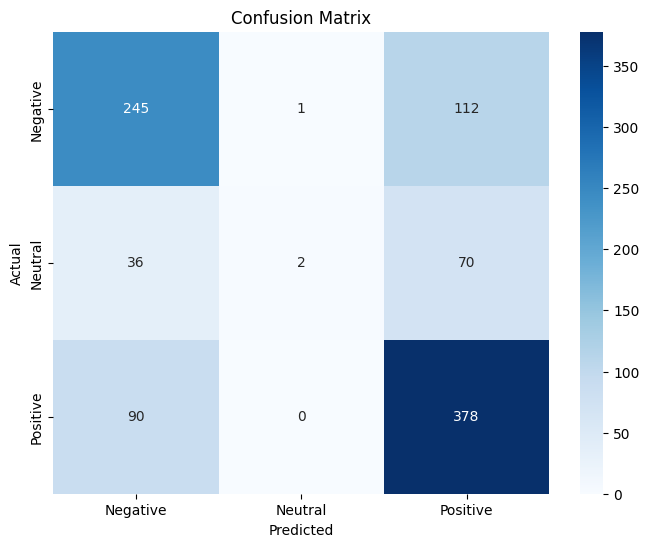

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize vectorizer and classifier in a pipeline
pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
f1s = []

X = train_data['text']
y = train_data['label']

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    pipeline.fit(X_train_fold, y_train_fold)
    y_pred_fold = pipeline.predict(X_val_fold)
    
    accuracies.append(accuracy_score(y_val_fold, y_pred_fold))
    precisions.append(precision_score(y_val_fold, y_pred_fold, average='weighted'))
    f1s.append(f1_score(y_val_fold, y_pred_fold, average='weighted'))
    
    print(f"Fold Accuracy: {accuracies[-1]:.4f}")
    print(f"Fold Precision: {precisions[-1]:.4f}")
    print(f"Fold F1 Score: {f1s[-1]:.4f}")

# Print mean values
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Mean Precision: {sum(precisions)/len(precisions):.4f}")
print(f"Mean F1 Score: {sum(f1s)/len(f1s):.4f}")

# Train final model on full training data
pipeline.fit(X, y)

# Predict on test data
y_test = test_data['label']
y_pred = pipeline.predict(test_data['text'])

# Evaluate the final model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
